In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [79]:
df = pd.read_csv('Hotel Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data_Cleaning

In [80]:
df_cleaned = df.drop_duplicates()

print(f"The number of main rows: {df.shape[0]}")
print(f"Number of rows after deduplication: {df_cleaned.shape[0]}")

The number of main rows: 119390
Number of rows after deduplication: 87396


In [81]:
df_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [82]:
missing_data = df_cleaned.isnull()

missing_count = missing_data.sum()

print(missing_count)

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


# 1.Which hotel has the most reservations?

In [21]:

hotel_reservations = df_cleaned.groupby('hotel')['is_canceled'].count()

top_hotel = hotel_reservations.nlargest(2)
most_booked_hotel = top_hotel.idxmax()

for hotel_type, reservations in top_hotel.items():
    print(f"Hotel: {hotel_type}\t Number of reservations: {reservations}")
print(f"The most booked hotel type is: {most_booked_hotel}")

Hotel: City Hotel	 Number of reservations: 53428
Hotel: Resort Hotel	 Number of reservations: 33968
The most booked hotel type is: City Hotel


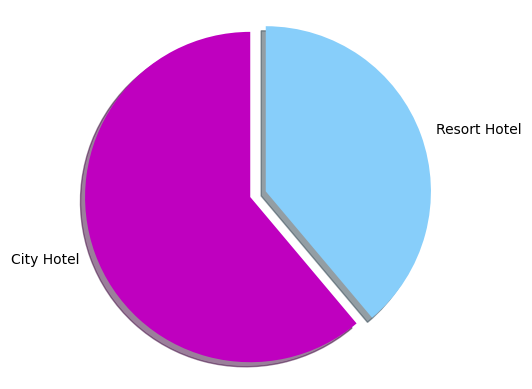

In [85]:
labels = hotel_reservations.index
sizes = hotel_reservations.values
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=['m', 'lightskyblue'], autopct='', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

# 2.What percentage of bookings were cancelled?

In [86]:
total_reservations = df_cleaned.shape[0]

print(f"The total number of reservations is: {total_reservations}")


The total number of reservations is: 87396


In [87]:

total_cancellations = (df_cleaned['is_canceled'] == 1).sum()

print(f"The total number of cancellations is: {total_cancellations}")

The total number of cancellations is: 24025


In [88]:
total_reservations = 87396
canceled_reservations = 24025

cancel_percentage = (canceled_reservations / total_reservations) * 100

print(f"The cancellation percentage is: {cancel_percentage}%")

The cancellation percentage is: 27.489816467572886%


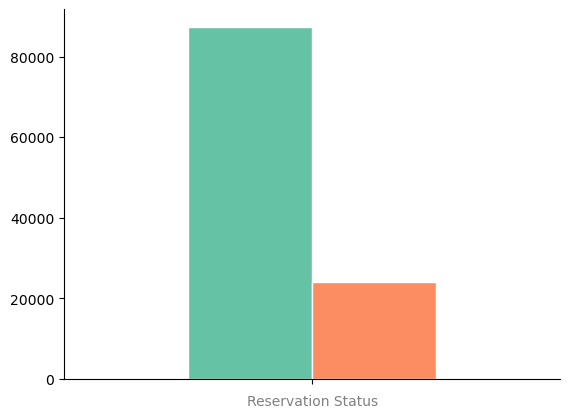

In [89]:
data = {'Reservations': total_reservations, 'Canceled Reservations': canceled_reservations}
sns.set_palette('Set2')
ax = pd.DataFrame(data, index=['']).plot(kind='bar', legend=False , edgecolor='white')

sns.despine(top=True, right=True)
ax.set_xlabel('Reservation Status', color='gray')

#plt.title('Reservations vs Canceled Reservations')
#plt.ylabel('Count')


plt.show()

# 3. Based on different hotel types, what percentage of bookings were cancelled?

In [90]:
canceled_grouped = df_cleaned[df_cleaned['reservation_status'] == 'Check-Out'].groupby('hotel')['reservation_status'].count()

total_grouped = df.groupby('hotel')['reservation_status'].count()

cancel_percentage = (canceled_grouped / total_grouped) * 100

print(cancel_percentage)

hotel
City Hotel      47.118366
Resort Hotel    64.882676
Name: reservation_status, dtype: float64


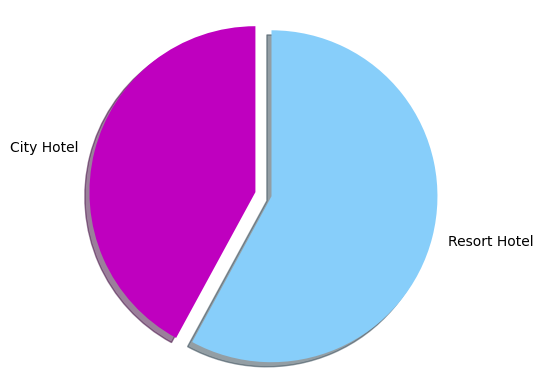

In [91]:
hotels = cancel_percentage.index
percentages = cancel_percentage.values
explode = (0.1, 0)
plt.pie(percentages,explode=explode, labels=hotels, autopct='',colors=['m', 'lightskyblue'],shadow=True,startangle=90)
plt.axis('equal')

plt.show()

# 4. What types of hotels are booked the most in different years The least booked?

In [92]:
hotel_counts = df_cleaned.groupby(['arrival_date_year', 'hotel'])['reservation_status'].count()

max_hotel = hotel_counts.groupby('arrival_date_year').idxmax().apply(lambda x: x[1])

min_hotel = hotel_counts.groupby('arrival_date_year').idxmin().apply(lambda x: x[1])

for year in hotel_counts.index.get_level_values('arrival_date_year').unique():
    print(f"Year {year}\t Most booked hotel type: {max_hotel[year]}\t Least booked hotel type: {min_hotel[year]}")

Year 2015	 Most booked hotel type: Resort Hotel	 Least booked hotel type: City Hotel
Year 2016	 Most booked hotel type: City Hotel	 Least booked hotel type: Resort Hotel
Year 2017	 Most booked hotel type: City Hotel	 Least booked hotel type: Resort Hotel


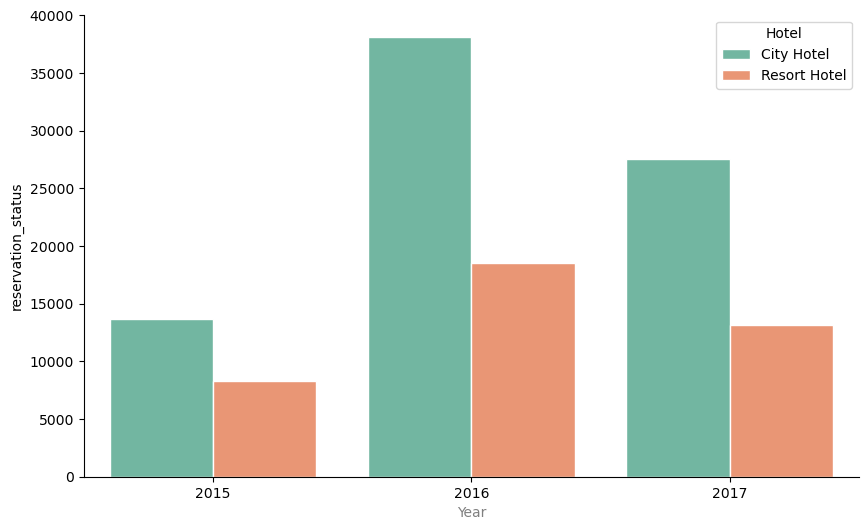

In [93]:
hotel_counts = df.groupby(['arrival_date_year', 'hotel'])['reservation_status'].count().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='arrival_date_year', y='reservation_status', hue='hotel', data=hotel_counts , edgecolor='white' , palette='Set2') 
sns.despine(top=True, right=True)
#plt.title('Count of Hotel Types by Year')
plt.xlabel('Year' , color='gray') 

#plt.ylabel('Count') 
plt.legend(title='Hotel')

plt.show() 

# 5.According to different hotel types, how ‘adr’ changes in different

In [95]:
hotel_types = df_cleaned['hotel'].unique()
months = df['arrival_date_month'].unique()
colors = ['rgb(102, 194, 165)', 'rgb(252, 141, 98)', 'rgb(141, 160, 203)', 'rgb(231, 138, 195)', 'rgb(166, 216, 84)', 'rgb(255, 217, 47)']

fig = go.Figure()

for i, hotel_type in enumerate(hotel_types):
    hotel_data = df[df['hotel'] == hotel_type]
    adr_by_month = hotel_data.groupby('arrival_date_month')['adr'].mean().reindex(months, fill_value=0)
    fig.add_trace(go.Bar(
        x=months,
        y=adr_by_month,
        name=hotel_type,
        marker=dict(color=colors[i % len(colors)])
    ))

fig.update_layout(
    barmode='group',
    # title='ADR Comparison by Hotel Type and Month',
    #xaxis=dict(title='Month'),
    #yaxis=dict(title='ADR'),
    legend=dict(title='Hotel Type')
)

fig.show()

# 6. The number of bookings per country and investigate that most of the guests are from which countries?

In [96]:
reservations_by_country_hotel = df_cleaned.groupby(['country', 'hotel'])['reservation_status'].count()
reservations_sorted = reservations_by_country_hotel.sort_values(ascending=False)

print(reservations_sorted)

country  hotel       
PRT      Resort Hotel    14238
         City Hotel      13215
FRA      City Hotel       7412
GBR      Resort Hotel     5905
         City Hotel       4528
                         ...  
GGY      Resort Hotel        1
         City Hotel          1
PLW      Resort Hotel        1
SYC      Resort Hotel        1
         City Hotel          1
Name: reservation_status, Length: 291, dtype: int64


In [97]:
max_guest_countries_sorted = reservations_by_country_hotel.groupby('hotel').idxmax().apply(lambda x: x[0]).sort_values(ascending=False)

print("Countries with the highest number of guests:")
print(max_guest_countries_sorted)

Countries with the highest number of guests:
hotel
City Hotel      PRT
Resort Hotel    PRT
Name: reservation_status, dtype: object


# 7. According to the ‘market_segment’ most of the guests book their rooms on what channels?

In [98]:
#  The market segment that has the most reservations
top_market_segment = df_cleaned['market_segment'].mode().iloc[0]

filtered_reservations = df_cleaned[df_cleaned['market_segment'] == top_market_segment]

channel_counts = filtered_reservations['distribution_channel'].value_counts()

print("Distribution channels used by market segment", top_market_segment, ":")
print(channel_counts)

Distribution channels used by market segment Online TA :
TA/TO        51316
GDS            136
Direct         131
Corporate       34
Undefined        1
Name: distribution_channel, dtype: int64


# 8. Check hotel wise daily rates mean, standard deviation, median, min , max.

In [99]:
statistics_by_market_segment = df_cleaned.groupby('hotel')['adr'].agg(['mean', 'std', 'median', 'min', 'max'])

print(statistics_by_market_segment)

                    mean        std  median   min     max
hotel                                                    
City Hotel    110.985944  48.062518   105.3  0.00  5400.0
Resort Hotel   99.025346  63.766782    79.5 -6.38   508.0
